# Ejercicio de Regresion Lineal

En este notebook vamos a describir paso a paso un ejercicio de prediccion, a traves de regresion lineal, de la cantidad de ocasiones en que se comparte un articulo del area de Machine Learning en un Blog

## Prediccion: Cantidad de ocasiones en que se comparte un articulo de un Blog

Se inicia importando, ajustando y visualizando los datos

In [1]:
#Importamos librerias y ajustes necesarios
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
plt.rcParams['figure.figsize'] = (16,9)
plt.style.use('ggplot')
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
#se carga el archivo de datos de entradas csv como dataset de Pandas. Los datos provienen del sitio web https://www.kdnuggets.com
data=pd.read_csv("./articulos de blog ml.csv")

Pandas es una libreria de Python destinada a analisis de datos, que proporciona estructuras de datos flexibles las cuales permiten trabajar con ellos de forma eficiente. Pandas ofrece las siguientes estructuras de datos: Series: Son arrays con indexacion (arrays con indice o etiquetados), similar a los diccionarios. Puede generarse a partir de diccionarios de las listas. Dataframe: Son estructuras de datos similares a las tables de base de base de datos relaciones con SQL. Panel, Panel4D y PanelND: Son estructuras de datos que permite trabajar con mas de 2 dimensiones

In [3]:
#Revisamos la dimension (registros x columnas) que contiene el archivo
data.shape

(161, 8)

In [4]:
#Podemos revisar los primeros registros para comprobar el funcionamiento
data.head()

,Title,url,Word count,# of Links,# of comments,# Images video,Elapsed days,# Shares
0,What is Machine Learning and how do we use it ...,https://blog.signals.network/what-is-machine-l...,1888,1,2.0,2,34,200000
1,10 Companies Using Machine Learning in Cool Ways,NaN,1742,9,NaN,9,5,25000
2,How Artificial Intelligence Is Revolutionizing...,NaN,962,6,0.0,1,10,42000
3,Dbrain and the Blockchain of Artificial Intell...,NaN,1221,3,NaN,2,68,200000
4,Nasa finds entire solar system filled with eig...,NaN,2039,1,104.0,4,131,200000


vemos que algunos atributos (columnas) tienen valores NaN; por ejemplo, en el atributo "url".
En este caso el atributo Shares sera la salida; es decir, el valor "Y" del modelo regresion lineal, el valor "Y" del modelo regresion lineal, el valor que se desea predecir

In [5]:
#Se realiza estadistica descriptiva para tener un conocimiento inicial de los datos:
data.describe()

,Word count,# of Links,# of comments,# Images video,Elapsed days,# Shares
count,161.000000,161.000000,129.000000,161.000000,161.000000,161.000000
mean,1808.260870,9.739130,8.782946,3.670807,98.124224,27948.347826
std,1141.919385,47.271625,13.142822,3.418290,114.337535,43408.006839
min,250.000000,0.000000,0.000000,1.000000,1.000000,0.000000
25%,990.000000,3.000000,2.000000,1.000000,31.000000,2800.000000
50%,1674.000000,5.000000,6.000000,3.000000,62.000000,16458.000000
75%,2369.000000,7.000000,12.000000,5.000000,124.000000,35691.000000
max,8401.000000,600.000000,104.000000,22.000000,1002.000000,350000.000000


Se observa, por ejemplo, la media del atributo Word count (cantidad de palabras) es de 1808.26.
Tambien se observa que el articulo mas pequeño contiene 250 palabras y el mas grande tiene 8401 palabras. Con respecto. Con respecto a cuanto se ha compartido un articulo (#Shares), existe los que nunca se han compartido (o veces) y los mas recurrentes con 350,000 ocasiones (muy popular!)

## Visualizacion General

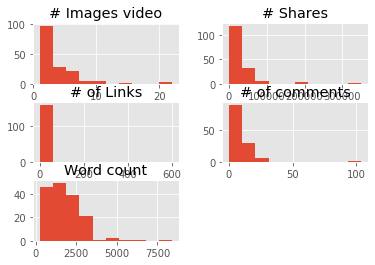

In [6]:
#Se visualizan los atributos de entrada mediante histogramas y barras (cuantitativas y cualitativas)
data.drop(['Title', 'url', 'Elapsed days'], 1).hist()
plt.show()

Las graficas anteriores comunican entre que valores se concentran la mayoria de los registros. Seguidamente se filtran los datos por cantidad de palabras dejando los registros con menos de 3500 y tambien #Shares con menos de 80.00

### Se puede visualizar por ejemplo Cantidad de palabras vs compartidos  

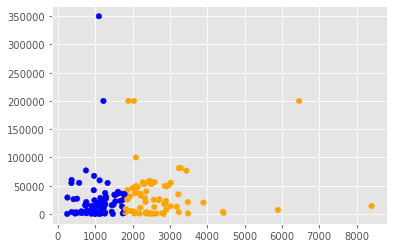

In [7]:
#Visualizar datos de entrada
colores= ['orange', 'blue']
tamanios=[30, 60]

f1= data['Word count'].values
f2= data['# Shares'].values

#pintar en 2 colores los puntos por debajo de la media de cantidad de palabras
asignar= []
for index,row in data.iterrows():
    if(row['Word count']>1808):
        asignar.append(colores[0])
    else:
        asignar.append(colores[1])
        
plt.scatter(f1, f2, c=asignar, s=tamanios[0])
plt.show()

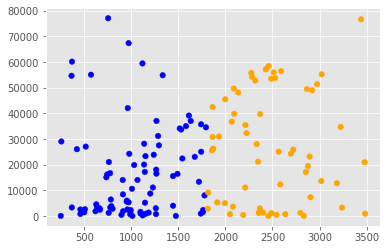

In [8]:
#visualizar los datos en la zona donde se concentran mas los puntos
#esto es en el eje x: entre 0 y 3500
#en el eje y: entre 0 y 80.00
filtered_data= data[(data['Word count'] <= 3500) & (data['# Shares'] <= 80000)]

f1 = filtered_data['Word count'].values
f2 = filtered_data['# Shares'].values

#Pintar en colores los puntos por debajo y por encima de la media de cantidad de palabras
asignar=[]
for index,row in filtered_data.iterrows():
    if(row['Word count']>1808):
        asignar.append(colores[0])
    else:
        asignar.append(colores[1])

plt.scatter(f1, f2, c=asignar, s=tamanios[0])
plt.show()

In [9]:
# Se revisan los cambios de valores una vez filtrados
filtered_data.describe()

,Word count,# of Links,# of comments,# Images video,Elapsed days,# Shares
count,148.000000,148.000000,121.000000,148.000000,148.000000,148.000000
mean,1640.209459,5.743243,7.256198,3.331081,91.554054,20545.648649
std,821.975365,6.064418,6.346297,2.706476,91.143923,19933.865031
min,250.000000,0.000000,0.000000,1.000000,1.000000,0.000000
25%,971.000000,3.000000,2.000000,1.000000,28.750000,2750.000000
50%,1536.000000,5.000000,6.000000,3.000000,60.000000,15836.000000
75%,2335.750000,7.000000,11.000000,4.000000,110.500000,34177.500000
max,3485.000000,49.000000,30.000000,22.000000,349.000000,77000.000000


### Regresion lineal simple (1 atributo con Python y SKLearn)

In [10]:
#Se asigna el atributo de entrada X para entrenamiento y las etiquetas Y
dataX= filtered_data[["Word count"]]
X_train = np.array(dataX)
Y_train = filtered_data['# Shares'].values

In [11]:
#Se genera el objeto de regresion lineal
regr = linear_model.LinearRegression()

# Se entre el modelo
regr.fit(X_train, Y_train)

#Se realizan las predicciones
y_pred = regr.predict(X_train)

# Se revisa los coeficientes obtenidos, en este caso sera la tangente
print('Coeficientes: \n', regr.coef_)

#Este es el valor donde corta el eje Y (en x=0)
print ('Termino independiente: \n', regr.intercept_)

#Error de cuadrado medio
print('Media del error cuadrado %.2f' %mean_squared_error(Y_train, y_pred))

#puntaje de varianza. El mejor puntaje es un 1.0
print('Puntaje de varianza: %2.f' % r2_score (Y_train, y_pred))

Coeficientes: 
 [5.69765366]
Termino independiente: 
 11200.303223074163
Media del error cuadrado 372888728.34
Puntaje de varianza:  0


De la ecuacion de la recta y= mx+b la pendiente "m" es el coeficiente 5.69765366 y el termino independiente "b" es 11200.303223074163. Existe un error cuadratico grande; por lo cual este modelo no es el mas adecuado. Pero estamos aprendiendo el funcionamiento del algoritmo, lo que resulta importante por el momento. Esto lo vemos reflejado en el puntaje de varianza el cual debe ser cerca de 1.0

### Visualizacion de la recta obtenida 

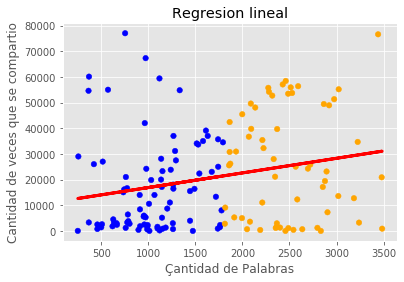

In [12]:
plt.scatter(X_train[:,0], Y_train, c=asignar, s=tamanios[0])
plt.plot(X_train[:,0], y_pred, color= 'red', linewidth=3)

plt.xlabel('Çantidad de Palabras')
plt.ylabel('Cantidad de veces que se compartio')
plt.title('Regresion lineal')

plt.show()

In [13]:
#Predecir
#Cuantos "Shares" se obtendra por un articulo de 2000 palabras
y_dosMil = regr.predict([[2000]])
print('Cantidad predecida:', int(y_dosMil))

Cantidad predecida: 22595


Devuelve una predeccion de 22595 "Shares" para un articulo de 2000 palabras

Como podemos mejorar el modelo?

### Regresion Lineal Multiple (multiples atributos) 

Se modifica el ejercicio utilizando mas de una variable de entrada para el modelo. Esto le da mayor precision al algoritmo de Machine Learning, de esta manera puede obtener predicciones mas complejas.

La ecuacion de la recta sera:

y= b + m1 x1 + m2 x2 + ... m(n) x(n)

(deja de ser una recta)

En este caso, se utilizan 2 atributos predictivos para poder graficar en 3D

El primer atributo seguira siendo la cantidad de palabras y el segundo atributo sera la suma de las 3 columnas de entrada (cantidad de enlaces, comentarios y cantidad de imagenes)

In [19]:
#Se pudiera mejorar el modelo, con una dimension mas
#Para poder graficar en 3D, se incluye un atributo extra que son la union de enlaces, comentarios e imagenes.
union = (filtered_data["# of Links"] + filtered_data['# of comments'].fillna(0) + filtered_data['# Images video'])

dataX2 = pd.DataFrame()
dataX2["Word count"] = filtered_data["Word count"]
dataX2["Union"] = union
XY_train = np.array(dataX2)
z_train = filtered_data['# Shares'].values

In [17]:
#Se genera un nuevo objeto de regresion lineal
regr2 = linear_model.LinearRegression()

#Se entra el modelo, esta vez, con 2 dimensiones
regr2.fit(XY_train, z_train)

#Se predice con los puntos sobre el plano hallado
z_pred = regr2.predict(XY_train)

#los coeficientes
print('Coeficientes: \n', regr2.coef_)
#Media del error cuadrado
print('Media del error cuadrado %.2f' % mean_squared_error(z_train, z_pred))
#Se evalua el puntaje de varianza (sinedo 1.0 el mejor posible)
print('Puntaje de varianza: %.2f' % r2_score(z_train, z_pred))

Coeficientes: 
 [   6.63216324 -483.40753769]
Media del error cuadrado 352122816.48
Puntaje de varianza: 0.11


Como se aprecia, se obtuvieron 2 coeficientes (cada uno correspondiente a 2 atributos predictivos), pues ahora lo que se grafica no es una linea si no un plano en 3 dimensiones

El error obtenido sigue siendo grande, aunque algo mejor que en el anterior y el puntaje de varianza mejora casi al doble del anterior (aunque sigue siendo malo, ya que esta lejos del 1)

### Se visualiza un plano de 3 dimensiones 

Text(0.5, 0.92, 'Regresion lineal con multiples atributos')

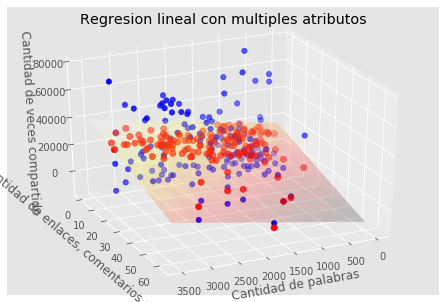

In [21]:
fig = plt.figure()
ax = Axes3D(fig)

#Se genera una malla, sobre la cual se grafica el plano
xx, yy = np.meshgrid(np.linspace(0, 3500, num=10), np.linspace(0, 60, num=10))

#Se calcula los valores del plano para los puntos x e y
nuevoX = (regr2.coef_[0] * xx)
nuevoY = (regr2.coef_[1] * yy)

#al igual los correspondientes valores para z. Se debe sumar el punto de intercepcion
z= (nuevoX + nuevoY + regr2.intercept_)


#Se grafica el plano 
ax.plot_surface(xx, yy, z, alpha = 0.2, cmap='hot')

#en azul los puntos en 3D
ax.scatter(XY_train[:,0], XY_train[:,1], z_train, c='blue', s=30)

ax.scatter(XY_train[:,0], XY_train[:,1], z_pred, c='red', s=40)

#Con esto se situa la camara con la que se visualiza
ax.view_init(elev=30., azim=65)

ax.set_xlabel('Cantidad de palabras')
ax.set_ylabel('Cantidad de enlaces, comentarios e imagenes')
ax.set_zlabel('Cantidad de veces compartido')
ax.set_title('Regresion lineal con multiples atributos')


Se puede rotar el grafico para apreciar el plano desde diversos angulos, modificando el valor del parametro azim en view_init con numeros del 0 a 360

### Prediccion 2, modelo de multiples atributos 

Que prediccion se tendra para un articulo de 2000 palabras, con 10 enlaces, 4 comentarios y 6 imagenes?

In [22]:
#Cuantos "Shares" se obtendran por un articulo con:
#2000 paabras y con enlaces 10, comentrios: 4, imagenes: 6
#segun el modelo, se hace:

z_Dosmil = regr2.predict([[2000, 10+4+6]])
print('Cantidad predecida: ', int(z_Dosmil))

Cantidad predecida:  20518


La prediccion queda en 20518 y probablemnte sea un poco mejor que la prediccion anterior de 1 un atributo

### Comparacion de las predicciones obtenidas en los modelos

En este caso, se obtiene mejora en el modelo de 2 dimensiones

In [23]:
#Se restan los errores calculados antes... Obviamente, "menos errores" es mejor
mejoraEnError = mean_squared_error(Y_train, y_pred) - mean_squared_error(z_train, z_pred)
print('Mejora en el error: ', mejoraEnError)

Mejora en el error:  20765911.860715985


In [24]:
#Tambien se calcula la mejora en la varianza:
mejoraEnVarianza = r2_score(z_train, z_pred) - r2_score(Y_train, y_pred)
print('Mejora en la varianza: ', mejoraEnVarianza)
#Aunque no parezca mucho, recuerde que el valor mas alto que se puede obtener es 1.0

Mejora en la varianza:  0.052615337462582956


In [27]:
#Y aunque disminuyen los "Shares" obtenidos en el 2do modelo, se observa una mejora de la prediccion de un articulo
#de 2000 palabras, pues seguramente sera un valor mas cercano a la realidad
diferenciaComparir = z_Dosmil - y_dosMil
print('Comparacion a traves de la diferencia: ', int(diferenciaComparir))

Comparacion a traves de la diferencia:  -2077


## Notas finales...posibles mejoras

Se ejemplifico el como utilizar SKLearn en Python para trabajar modelos de Regresion Lineal con 1 o multiples atributos. Del ejercicio no se obtuvo una gran confianza en las predicciones. Por ejemplo, del primer modelo, con 2000 palabras se predicen 22595 pero el margen de error haciendo raiz del error cuadratico medio es aproximadamente 19310. Es decir, escribir un articulo de 2000 palabras los mismo se obtendran 3285 "Shares" que 41905. En este caso este modelo se utiliza para aprende a usarlo y habra que ver en que casos si brinde predicciones acertadas.

Para mejorar el modelo, se deberian utilizar mas dimensiones y encontrar datos de entrada mejores.

Atencion.
Es posible que no exista---nunca---ninguna relacion entre atributos de entrada y el exito en "Shares" del articulo. Por lo que, al ser simple experimento con datos sinteticos, nunca se predecira con certeza esta salida.

Este ejemplo utiliza un archivo de datos sinteticos que se integro con informacion de articulos sobre Machine learning. Si se desea mejorar las predicciones, se deben utilizar mas de 2 atributos (aqui se hizo para poder graficar en 3D). Seria conveniente adicionar y mejorar la calidad de informacion provista por los atributos de entrada, pues no es lo mismo un enlace a un portal con multitud de visitas al mes, que otros mas modestos